In [1]:
import os
import pandas as pd
import csv
import numpy as np
from scipy.stats import linregress
import matplotlib.pyplot as plt
import scipy.stats as stats


In [2]:
# create the csv file
#source from Zillow Housing Data
inv_data = "Metro_invt_fs_uc_sfrcondo_sm_month.csv"
value_data = "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
zipcode_value = "Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
two_bedroom_data = "Zip_zhvi_bdrmcnt_2_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv"
# read the csv file 
df_inv = pd.read_csv(inv_data)
df_value = pd.read_csv(value_data)
df_two_bedroom = pd.read_csv(two_bedroom_data)
df_zipcode_value = pd.read_csv(zipcode_value)
print(df_value.head())

   RegionID  SizeRank       RegionName RegionType StateName     2000-01-31   
0    102001         0    United States    country       NaN  112815.884620  \
1    394913         1     New York, NY        msa        NY  179016.866340   
2    753899         2  Los Angeles, CA        msa        CA  225229.750975   
3    394463         3      Chicago, IL        msa        IL  140260.935566   
4    394514         4       Dallas, TX        msa        TX  128720.957496   

      2000-02-29     2000-03-31     2000-04-30     2000-05-31  ...   
0  113014.297752  113260.209562  113787.522445  114394.274429  ...  \
1  179778.701216  180546.411097  182101.254842  183708.268404  ...   
2  226062.852930  227175.971878  229409.988288  231860.878234  ...   
3  140393.923049  140644.187618  141267.740940  142016.485458  ...   
4  128785.370590  128858.163118  129040.266249  129272.910526  ...   

      2022-06-30     2022-07-31     2022-08-31     2022-09-30     2022-10-31   
0  334961.616261  337453.60086

In [3]:
df_value.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
0,102001,0,United States,country,NaN,112815.884620,113014.297752,113260.209562,113787.522445,114394.274429,...,334961.616261,337453.600864,337928.527316,336814.213561,335753.555458,334897.253447,333798.513877,333158.363534,333102.578964,334268.683188
1,394913,1,"New York, NY",msa,NY,179016.866340,179778.701216,180546.411097,182101.254842,183708.268404,...,566539.036321,570564.731278,571640.460406,569836.459423,567766.726434,566031.028685,563685.360140,563651.572975,564812.485457,568543.199929
2,753899,2,"Los Angeles, CA",msa,CA,225229.750975,226062.852930,227175.971878,229409.988288,231860.878234,...,920841.330371,922587.865602,919215.589300,913193.138330,907774.524018,904032.349925,899652.326689,891231.312030,880994.390800,873619.353300
3,394463,3,"Chicago, IL",msa,IL,140260.935566,140393.923049,140644.187618,141267.740940,142016.485458,...,290308.541368,290720.146297,290078.407071,288473.411004,287194.888822,286510.185297,285844.950695,286411.916479,287467.453384,289343.730912
4,394514,4,"Dallas, TX",msa,TX,128720.957496,128785.370590,128858.163118,129040.266249,129272.910526,...,379303.718267,382090.595514,382118.882471,380156.352127,378076.347371,376171.657567,373642.798314,371065.165933,368975.516865,368252.408975


In [4]:
df_value.describe()

,RegionID,SizeRank,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
count,896.000000,896.000000,432.000000,433.000000,434.000000,436.000000,438.000000,439.000000,440.000000,441.000000,...,8.960000e+02,8.960000e+02,8.960000e+02,8.950000e+02,8.960000e+02,8.960000e+02,8.960000e+02,8.960000e+02,8.960000e+02,8.960000e+02
mean,412080.852679,461.632812,99810.089203,99983.624112,100139.577723,100753.418759,101494.877225,102011.614593,102707.391877,103283.272783,...,2.592480e+05,2.606930e+05,2.606944e+05,2.581580e+05,2.586170e+05,2.579387e+05,2.571885e+05,2.570625e+05,2.574272e+05,2.587230e+05
std,78335.582250,268.584051,47620.340276,47731.561281,47904.592839,48553.145545,49194.761477,49795.133451,50457.196895,51174.606194,...,1.765380e+05,1.767572e+05,1.755061e+05,1.684874e+05,1.719539e+05,1.709037e+05,1.698618e+05,1.683448e+05,1.669897e+05,1.663847e+05
min,102001.000000,0.000000,26025.150401,25990.204284,25950.152067,25877.854420,25839.957438,25835.197898,25911.045348,26032.737579,...,3.199823e+04,3.215789e+04,3.216600e+04,3.190951e+04,3.145355e+04,3.090852e+04,3.035909e+04,3.087501e+04,3.154925e+04,3.257723e+04
25%,394546.500000,230.750000,66263.462762,66384.239385,66607.657114,67298.075377,67830.934233,68063.657711,68246.206399,68501.616942,...,1.529674e+05,1.542769e+05,1.549189e+05,1.547683e+05,1.545189e+05,1.543580e+05,1.542528e+05,1.547595e+05,1.556735e+05,1.573313e+05
50%,394795.500000,459.500000,88719.654106,88936.734451,88989.371118,89556.451449,90473.758741,90865.956098,91402.101894,91719.963957,...,2.055362e+05,2.073011e+05,2.079779e+05,2.070092e+05,2.062713e+05,2.061831e+05,2.058187e+05,2.061135e+05,2.070960e+05,2.084800e+05
75%,395045.250000,689.250000,118717.549198,118915.250212,119004.681835,119916.298919,120679.870990,121133.511354,121819.247310,122124.196048,...,3.084603e+05,3.109483e+05,3.114706e+05,3.086872e+05,3.090706e+05,3.086043e+05,3.081124e+05,3.094147e+05,3.094860e+05,3.111876e+05
max,753929.000000,939.000000,376493.771454,378346.951193,381173.091789,388894.919423,397229.494904,406869.976207,415337.047933,425544.910944,...,1.563665e+06,1.552149e+06,1.531567e+06,1.379593e+06,1.493543e+06,1.486338e+06,1.482425e+06,1.470284e+06,1.450886e+06,1.432530e+06


In [6]:
# collect the information for washington state
df_inv_mi = df_inv[df_inv['StateName']=='WA']
df_inv_mi.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,2023-03-31
15,395078,15,"Seattle, WA",msa,WA,7287.0,8277.0,10148.0,11666.0,12963.0,...,9917.0,11295.0,11941.0,11850.0,11111.0,9913.0,8266.0,6781.0,5740.0,5714.0
99,395113,100,"Spokane, WA",msa,WA,2088.0,2285.0,2678.0,3043.0,3265.0,...,1631.0,1967.0,2184.0,2267.0,2178.0,1962.0,1655.0,1359.0,1140.0,1112.0
166,394741,168,"Kennewick, WA",msa,WA,855.0,890.0,978.0,1053.0,1120.0,...,590.0,656.0,697.0,720.0,708.0,683.0,628.0,573.0,523.0,527.0
170,394937,172,"Olympia, WA",msa,WA,776.0,824.0,949.0,1070.0,1184.0,...,799.0,918.0,996.0,986.0,925.0,819.0,703.0,610.0,526.0,506.0
179,394412,181,"Bremerton, WA",msa,WA,687.0,720.0,828.0,923.0,1009.0,...,705.0,814.0,900.0,902.0,839.0,728.0,611.0,512.0,434.0,426.0


In [7]:
# give variable name for collecting state data
df_value_mi = df_value[df_value['StateName']=='WA']
df_value_mi.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       '2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30', '2000-05-31',
       ...
       '2022-06-30', '2022-07-31', '2022-08-31', '2022-09-30', '2022-10-31',
       '2022-11-30', '2022-12-31', '2023-01-31', '2023-02-28', '2023-03-31'],
      dtype='object', length=284)

In [8]:
#coolect the data only 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName, "Date", 'Average home values'
df_unpivoted_value_wa = df_value_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Average Home Values')
df_unpivoted_value_wa


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
0,395078,15,"Seattle, WA",msa,WA,2000-01-31,223721.739989
1,395113,100,"Spokane, WA",msa,WA,2000-01-31,123526.452122
2,394741,168,"Kennewick, WA",msa,WA,2000-01-31,131228.301982
3,394937,172,"Olympia, WA",msa,WA,2000-01-31,149943.442117
4,394412,181,"Bremerton, WA",msa,WA,2000-01-31,153818.650792
...,...,...,...,...,...,...,...
5575,395092,510,"Shelton, WA",msa,WA,2023-03-31,426028.494448
5576,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,390558.799183
5577,395008,620,"Pullman, WA",msa,WA,2023-03-31,364908.619259
5578,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,474549.838418


In [9]:
# change the Date daa into datetime format
df_unpivoted_value_wa['Date']=pd.to_datetime(df_unpivoted_value_wa['Date'])

In [10]:
df_unpivoted_value_wa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5580 entries, 0 to 5579
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   RegionID             5580 non-null   int64         
 1   SizeRank             5580 non-null   int64         
 2   RegionName           5580 non-null   object        
 3   RegionType           5580 non-null   object        
 4   StateName            5580 non-null   object        
 5   Date                 5580 non-null   datetime64[ns]
 6   Average Home Values  4553 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 305.3+ KB


In [11]:
#collect the state data only >= 2019 when the pandamic started,
df_post_covid_value_wa = df_unpivoted_value_wa[df_unpivoted_value_wa['Date'].dt.year>=2018]
df_post_covid_value_wa

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values
4320,395078,15,"Seattle, WA",msa,WA,2018-01-31,480349.718481
4321,395113,100,"Spokane, WA",msa,WA,2018-01-31,226948.915012
4322,394741,168,"Kennewick, WA",msa,WA,2018-01-31,257128.699896
4323,394937,172,"Olympia, WA",msa,WA,2018-01-31,305990.056672
4324,394412,181,"Bremerton, WA",msa,WA,2018-01-31,345817.191941
...,...,...,...,...,...,...,...
5575,395092,510,"Shelton, WA",msa,WA,2023-03-31,426028.494448
5576,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,390558.799183
5577,395008,620,"Pullman, WA",msa,WA,2023-03-31,364908.619259
5578,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,474549.838418


In [12]:
# Average home values change into two decimel places and '$' symbol make new data frame.
df_post_covid_value_wa["Average Home Values1"] = df_post_covid_value_wa["Average Home Values"].map("${:,.2f}".format)
df_post_covid_value_wa

C:\Users\starb\AppData\Local\Temp\ipykernel_12504\3609225170.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_post_covid_value_wa["Average Home Values1"] = df_post_covid_value_wa["Average Home Values"].map("${:,.2f}".format)


,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values,Average Home Values1
4320,395078,15,"Seattle, WA",msa,WA,2018-01-31,480349.718481,"$480,349.72"
4321,395113,100,"Spokane, WA",msa,WA,2018-01-31,226948.915012,"$226,948.92"
4322,394741,168,"Kennewick, WA",msa,WA,2018-01-31,257128.699896,"$257,128.70"
4323,394937,172,"Olympia, WA",msa,WA,2018-01-31,305990.056672,"$305,990.06"
4324,394412,181,"Bremerton, WA",msa,WA,2018-01-31,345817.191941,"$345,817.19"
...,...,...,...,...,...,...,...,...
5575,395092,510,"Shelton, WA",msa,WA,2023-03-31,426028.494448,"$426,028.49"
5576,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,390558.799183,"$390,558.80"
5577,395008,620,"Pullman, WA",msa,WA,2023-03-31,364908.619259,"$364,908.62"
5578,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,474549.838418,"$474,549.84"


In [13]:
# to find the unique value of RegionName
unique_value = df_post_covid_value_wa["RegionName"].unique()
unique_value

array(['Seattle, WA', 'Spokane, WA', 'Kennewick, WA', 'Olympia, WA',
       'Bremerton, WA', 'Yakima, WA', 'Bellingham, WA',
       'Mount Vernon, WA', 'Wenatchee, WA', 'Longview, WA',
       'Moses Lake, WA', 'Oak Harbor, WA', 'Centralia, WA',
       'Port Angeles, WA', 'Aberdeen, WA', 'Shelton, WA',
       'Walla Walla, WA', 'Pullman, WA', 'Ellensburg, WA', 'Othello, WA'],
      dtype=object)

In [14]:
# count the states
df_post_covid_value_wa["RegionName"].count

<bound method Series.count of 4320        Seattle, WA
4321        Spokane, WA
4322      Kennewick, WA
4323        Olympia, WA
4324      Bremerton, WA
             ...       
5575        Shelton, WA
5576    Walla Walla, WA
5577        Pullman, WA
5578     Ellensburg, WA
5579        Othello, WA
Name: RegionName, Length: 1260, dtype: object>

In [15]:
# selected cities into a list for for loop (and later for plot labels)'Seattle, WA', 'Spokane, WA', 'Kennewick, WA', 'Olympia, WA','Bellingham, WA'
selected_cities = ['Seattle, WA', 'Spokane, WA', 'Kennewick, WA', 'Olympia, WA','Bellingham, WA']

# Create empty list to fill with average home values(for plotting)
Average_value = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in selected_cities:
    
    # Locate the rows which Average home values depent on the states
    final_data =df_post_covid_value_wa.loc[df_post_covid_value_wa['RegionName']== x, 'Average Home Values']
    
    # add subset 
    Average_value.append(final_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = final_data.quantile([0.25, 0.50,0.75])
    lower_qrt = quartiles[0.25]
    upper_qrt = quartiles[0.75]
    iqr = upper_qrt - lower_qrt

    lower_bount = lower_qrt-(1.5*iqr)
    upper_bount = upper_qrt+(1.5*iqr)

    outliers = final_data.loc[(final_data < lower_bount) | (final_data > upper_bount)]

    print(f"{x}'s potential outliers: {outliers}")

Seattle, WA's potential outliers: Series([], Name: Average Home Values, dtype: float64)
Spokane, WA's potential outliers: Series([], Name: Average Home Values, dtype: float64)
Kennewick, WA's potential outliers: Series([], Name: Average Home Values, dtype: float64)
Olympia, WA's potential outliers: Series([], Name: Average Home Values, dtype: float64)
Bellingham, WA's potential outliers: Series([], Name: Average Home Values, dtype: float64)


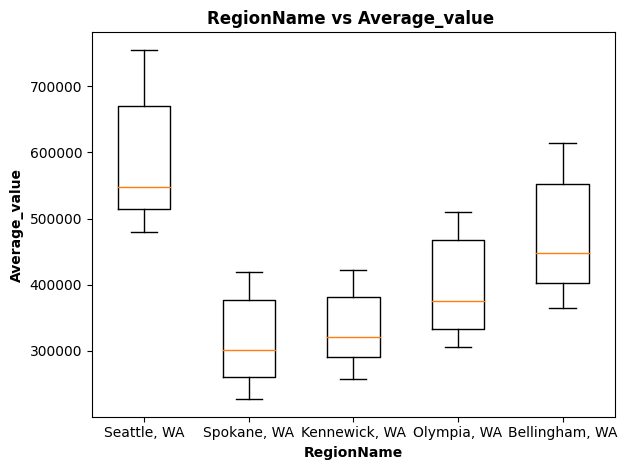

In [16]:
# Generate a box plot that shows the distrubution of Average home values for each states.

fig1, final_data = plt.subplots()
final_data.boxplot(Average_value, labels=selected_cities ,flierprops={'markerfacecolor':'r','markersize': 10})
        

# Set x/y label, title

final_data.set_xlabel('RegionName', fontweight='bold')
final_data.set_ylabel('Average_value', fontweight='bold')
final_data.set_title('RegionName vs Average_value ', fontweight='bold')
# Save box plot graph to Images folder
plt.tight_layout()


# Present the box plot chart
plt.show()

# To close pyplot
plt.close()

In [62]:
seattle_data = df_post_covid_value_wa[(df_post_covid_value_wa["RegionName"] == "Seattle, WA")]
spokane_data = df_post_covid_value_wa[(df_post_covid_value_wa["RegionName"] == "Spokane, WA")]
kennewick_data = df_post_covid_value_wa[(df_post_covid_value_wa["RegionName"] == "Kennewick, WA")]
olympia_data = df_post_covid_value_wa[(df_post_covid_value_wa["RegionName"] == "Olympia, WA")]
bellingham_data = df_post_covid_value_wa[(df_post_covid_value_wa["RegionName"] == "Bellingham, WA")]





In [38]:
# Sort the states by `Average Home Values` in ascending order and display the top 5 rows.
top_five_cities_wa = df_post_covid_value_wa.sort_values("Average Home Values", ascending = False)
top_five_cities_wa.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values,Average Home Values1
5380,395078,15,"Seattle, WA",msa,WA,2022-06-30,754950.041018,"$754,950.04"
5360,395078,15,"Seattle, WA",msa,WA,2022-05-31,752525.303514,"$752,525.30"
5400,395078,15,"Seattle, WA",msa,WA,2022-07-31,748674.714697,"$748,674.71"
5340,395078,15,"Seattle, WA",msa,WA,2022-04-30,741671.939496,"$741,671.94"
5420,395078,15,"Seattle, WA",msa,WA,2022-08-31,737544.182920,"$737,544.18"


In [39]:
## Sort the states by `Average Home Values` in ascending order and display the last 5 rows.
bottom_five_cities_wa = df_post_covid_value_wa.sort_values("Average Home Values", ascending = True)
bottom_five_cities_wa.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values,Average Home Values1
4334,394298,473,"Aberdeen, WA",msa,WA,2018-01-31,161144.929884,"$161,144.93"
4354,394298,473,"Aberdeen, WA",msa,WA,2018-02-28,163071.075643,"$163,071.08"
4374,394298,473,"Aberdeen, WA",msa,WA,2018-03-31,165141.270308,"$165,141.27"
4394,394298,473,"Aberdeen, WA",msa,WA,2018-04-30,167174.796637,"$167,174.80"
4339,753908,909,"Othello, WA",msa,WA,2018-01-31,167703.250684,"$167,703.25"


In [19]:
# collect the data only 'RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName','Date','Total Inventory' from the inventory list
df_unpivoted_inv_wa = df_inv_mi.melt(
    id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName'], var_name='Date', value_name='Total Inventory')
df_unpivoted_inv_wa

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,395078,15,"Seattle, WA",msa,WA,2018-03-31,7287.0
1,395113,100,"Spokane, WA",msa,WA,2018-03-31,2088.0
2,394741,168,"Kennewick, WA",msa,WA,2018-03-31,855.0
3,394937,172,"Olympia, WA",msa,WA,2018-03-31,776.0
4,394412,181,"Bremerton, WA",msa,WA,2018-03-31,687.0
...,...,...,...,...,...,...,...
1215,395092,510,"Shelton, WA",msa,WA,2023-03-31,176.0
1216,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,149.0
1217,395008,620,"Pullman, WA",msa,WA,2023-03-31,87.0
1218,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,148.0


In [20]:
#change the Date daa into datetime format
df_unpivoted_inv_wa['Date']=pd.to_datetime(df_unpivoted_inv_wa['Date'])

In [21]:
#collect the state inventory data only >= 2019 when the pandamic started,
df_post_covid_inv_wa = df_unpivoted_inv_wa[df_unpivoted_inv_wa['Date'].dt.year>=2018]
df_post_covid_inv_wa

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,395078,15,"Seattle, WA",msa,WA,2018-03-31,7287.0
1,395113,100,"Spokane, WA",msa,WA,2018-03-31,2088.0
2,394741,168,"Kennewick, WA",msa,WA,2018-03-31,855.0
3,394937,172,"Olympia, WA",msa,WA,2018-03-31,776.0
4,394412,181,"Bremerton, WA",msa,WA,2018-03-31,687.0
...,...,...,...,...,...,...,...
1215,395092,510,"Shelton, WA",msa,WA,2023-03-31,176.0
1216,395199,525,"Walla Walla, WA",msa,WA,2023-03-31,149.0
1217,395008,620,"Pullman, WA",msa,WA,2023-03-31,87.0
1218,394567,663,"Ellensburg, WA",msa,WA,2023-03-31,148.0


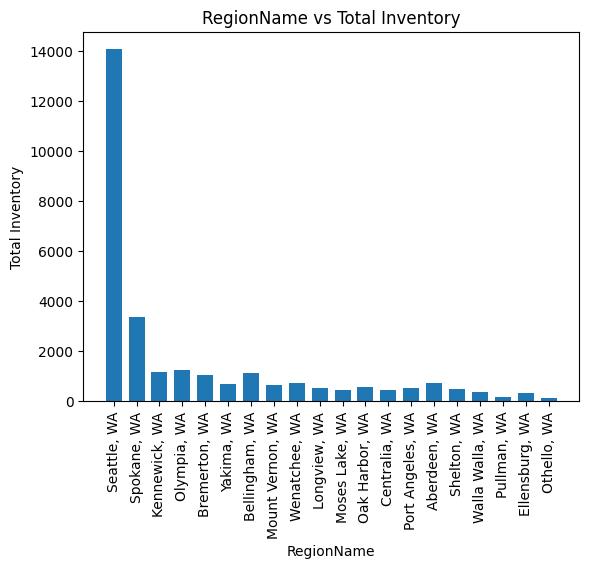

In [22]:

# Create a bar chart based upon the above data RegionName vs Total Inventory for the different states
plt.bar(df_post_covid_inv_wa["RegionName"], df_post_covid_inv_wa["Total Inventory"] ,align = 'center',width=0.7)


plt.xticks(rotation='vertical')
plt.xlabel("RegionName")
plt.ylabel("Total Inventory")
plt.title("RegionName vs Total Inventory")
plt.show()


In [23]:
# collect the information only for seattle city from washington state fro total inventory
df_post_covid_inv_seattle = df_post_covid_inv_wa[df_post_covid_inv_wa['RegionName']=="Seattle, WA"]
df_post_covid_inv_seattle.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
0,395078,15,"Seattle, WA",msa,WA,2018-03-31,7287.0
20,395078,15,"Seattle, WA",msa,WA,2018-04-30,8277.0
40,395078,15,"Seattle, WA",msa,WA,2018-05-31,10148.0
60,395078,15,"Seattle, WA",msa,WA,2018-06-30,11666.0
80,395078,15,"Seattle, WA",msa,WA,2018-07-31,12963.0


<Axes: xlabel='Date'>

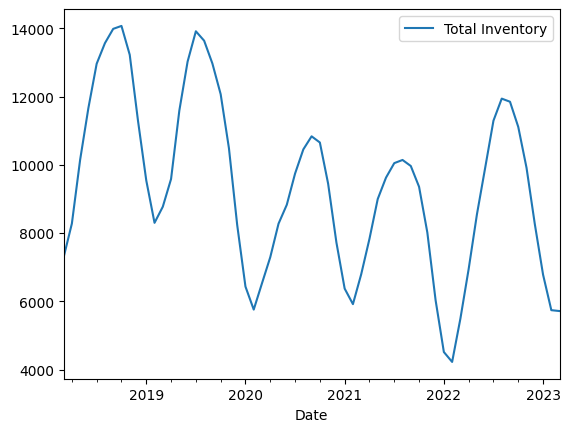

In [25]:
##create the line plot between 'Date' and 'Total Inventory'
df_post_covid_inv_seattle.plot(x='Date', y='Total Inventory', kind='line')

In [26]:
# Sort the cities by `Total Inventory` in ascending order and display the top 5 rows.
top_five_cities = df_post_covid_inv_wa.sort_values("Total Inventory", ascending = False)
top_five_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
140,395078,15,"Seattle, WA",msa,WA,2018-10-31,14072.0
120,395078,15,"Seattle, WA",msa,WA,2018-09-30,13986.0
320,395078,15,"Seattle, WA",msa,WA,2019-07-31,13915.0
340,395078,15,"Seattle, WA",msa,WA,2019-08-31,13639.0
100,395078,15,"Seattle, WA",msa,WA,2018-08-31,13567.0


In [27]:
# Sort the cities by `Total Inventory` in ascending order and display the bottom 5 rows.
top_five_cities = df_post_covid_inv_wa.sort_values("Total Inventory", ascending = True)
top_five_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Total Inventory
679,753908,909,"Othello, WA",msa,WA,2020-12-31,28.0
699,753908,909,"Othello, WA",msa,WA,2021-01-31,31.0
659,753908,909,"Othello, WA",msa,WA,2020-11-30,32.0
519,753908,909,"Othello, WA",msa,WA,2020-04-30,33.0
559,753908,909,"Othello, WA",msa,WA,2020-06-30,34.0


In [28]:
# # collect the information only for seattle city from washington state fro average home values
df_post_covid_value_seattle = df_post_covid_value_wa[df_post_covid_value_wa['RegionName']=="Seattle, WA"]

df_post_covid_value_seattle.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values,Average Home Values1
4320,395078,15,"Seattle, WA",msa,WA,2018-01-31,480349.718481,"$480,349.72"
4340,395078,15,"Seattle, WA",msa,WA,2018-02-28,486790.411703,"$486,790.41"
4360,395078,15,"Seattle, WA",msa,WA,2018-03-31,493505.693938,"$493,505.69"
4380,395078,15,"Seattle, WA",msa,WA,2018-04-30,499667.563746,"$499,667.56"
4400,395078,15,"Seattle, WA",msa,WA,2018-05-31,505175.139045,"$505,175.14"


<Axes: xlabel='Date'>

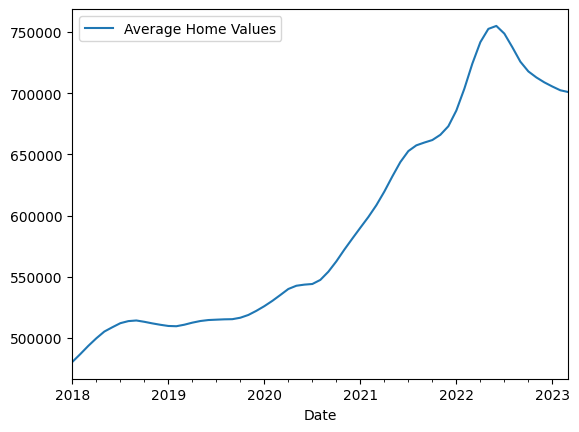

In [29]:
#create the line plot between 'Date' and 'Average Home Values'
df_post_covid_value_seattle.plot(x='Date', y='Average Home Values', kind='line')

In [30]:
# Sort the cities by `Average Home Values` in ascending order and display the top 5 rows.
top_five_cities = df_post_covid_value_seattle.sort_values("Average Home Values", ascending = False)
top_five_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values,Average Home Values1
5380,395078,15,"Seattle, WA",msa,WA,2022-06-30,754950.041018,"$754,950.04"
5360,395078,15,"Seattle, WA",msa,WA,2022-05-31,752525.303514,"$752,525.30"
5400,395078,15,"Seattle, WA",msa,WA,2022-07-31,748674.714697,"$748,674.71"
5340,395078,15,"Seattle, WA",msa,WA,2022-04-30,741671.939496,"$741,671.94"
5420,395078,15,"Seattle, WA",msa,WA,2022-08-31,737544.182920,"$737,544.18"


In [31]:
# Sort the cities by `Average Home Values` in ascending order and display the bottom 5 rows.
bottom_five_cities = df_post_covid_value_seattle.sort_values("Average Home Values", ascending = True)
bottom_five_cities.head(5)

,RegionID,SizeRank,RegionName,RegionType,StateName,Date,Average Home Values,Average Home Values1
4320,395078,15,"Seattle, WA",msa,WA,2018-01-31,480349.718481,"$480,349.72"
4340,395078,15,"Seattle, WA",msa,WA,2018-02-28,486790.411703,"$486,790.41"
4360,395078,15,"Seattle, WA",msa,WA,2018-03-31,493505.693938,"$493,505.69"
4380,395078,15,"Seattle, WA",msa,WA,2018-04-30,499667.563746,"$499,667.56"
4400,395078,15,"Seattle, WA",msa,WA,2018-05-31,505175.139045,"$505,175.14"


In [ ]:
-o